# 45.Spark编程

## 45.1.导入pyspark包

In [1]:
#

## 45.2 SparkSession及其创建

In [2]:
from pyspark.sql import SparkSession

In [3]:
SparkSession.__doc__

'The entry point to programming Spark with the Dataset and DataFrame API.\n\n    A SparkSession can be used create :class:`DataFrame`, register :class:`DataFrame` as\n    tables, execute SQL over tables, cache tables, and read parquet files.\n    To create a SparkSession, use the following builder pattern:\n\n    >>> spark = SparkSession.builder \\\n    ...     .master("local") \\\n    ...     .appName("Word Count") \\\n    ...     .config("spark.some.config.option", "some-value") \\\n    ...     .getOrCreate()\n\n    .. autoattribute:: builder\n       :annotation:\n    '

In [4]:
dir(SparkSession)

['Builder',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_convert_from_pandas',
 '_createFromLocal',
 '_createFromRDD',
 '_create_from_pandas_with_arrow',
 '_create_shell_session',
 '_get_numpy_record_dtype',
 '_inferSchema',
 '_inferSchemaFromList',
 '_instantiatedSession',
 '_repr_html_',
 'builder',
 'catalog',
 'conf',
 'createDataFrame',
 'newSession',
 'range',
 'read',
 'readStream',
 'sparkContext',
 'sql',
 'stop',
 'streams',
 'table',
 'udf',
 'version']

In [5]:
#

In [6]:
mySpark = SparkSession.builder\
    .appName('My_App')\
    .master('local')\
    .getOrCreate()

In [7]:
mySpark

## 45.3 Spark数据抽象类型

In [8]:
#

In [9]:
myDF = mySpark.range(1,100).toDF("number")

In [10]:
print(myDF)

DataFrame[number: bigint]


In [11]:
myDF.printSchema()

root
 |-- number: long (nullable = false)



In [12]:
 #

In [13]:
divisBy2 = myDF.where("number % 2 = 0")
divisBy2

DataFrame[number: bigint]

In [14]:
divisBy2.count()

49

In [15]:
myDF.take(5)

[Row(number=1), Row(number=2), Row(number=3), Row(number=4), Row(number=5)]

In [16]:
#

In [17]:
myDF = mySpark.range(1,100).toDF("number").where("number % 2 = 0").sort("number")
myDF

DataFrame[number: bigint]

In [18]:
myDF=mySpark.range(100,1).toDF("number").where("number % 2 = 0").filter("number % 5 = 0").sort("number").explain()

== Physical Plan ==
*(2) Sort [number#16L ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(number#16L ASC NULLS FIRST, 200)
   +- *(1) Project [id#14L AS number#16L]
      +- *(1) Filter (((id#14L % 2) = 0) && ((id#14L % 5) = 0))
         +- *(1) Range (100, 1, step=1, splits=1)


## 45.4. Spark DataFrame操作

In [19]:
df = mySpark.read.csv('flights.csv', header=True)

In [20]:
df.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



In [21]:
df.cache()

DataFrame[year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, carrier: string, tailnum: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, minute: string]

In [22]:
df.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    1|  1|       1|       96|     235|       70|     AS| N508AS|   145|   PDX| ANC|     194|    1542|   0|     1|
|2014|    1|  1|       4|       -6|     738|      -23|     US| N195UW|  1830|   SEA| CLT|     252|    2279|   0|     4|
|2014|    1|  1|       8|       13|     548|       -4|     UA| N37422|  1609|   PDX| IAH|     201|    1825|   0|     8|
|2014|    1|  1|      28|       -2|     800|      -23|     US| N547UW|   466|   PDX| CLT|     251|    2282|   0|    28|
|2014|    1|  1|      34|       44|     325|       43|     AS| N762AS|   121|   SEA| ANC|     201|    1448|   0|    34|
+----+-----+---+--------+---------+-----

In [23]:
df.columns

['year',
 'month',
 'day',
 'dep_time',
 'dep_delay',
 'arr_time',
 'arr_delay',
 'carrier',
 'tailnum',
 'flight',
 'origin',
 'dest',
 'air_time',
 'distance',
 'hour',
 'minute']

In [24]:
df.count()

52535

In [25]:
spark_df_flights_selected = df.select(df['tailnum'], df['flight'],
                                      df['dest'], df['arr_delay'],
                                      df['dep_delay'])

In [26]:
spark_df_flights_selected.show(3)

+-------+------+----+---------+---------+
|tailnum|flight|dest|arr_delay|dep_delay|
+-------+------+----+---------+---------+
| N508AS|   145| ANC|       70|       96|
| N195UW|  1830| CLT|      -23|       -6|
| N37422|  1609| IAH|       -4|       13|
+-------+------+----+---------+---------+
only showing top 3 rows



In [27]:
df.createTempView('flights_view')

In [28]:
#

## 45.5 SQL编程

In [29]:
sql_str = 'select dest, arr_delay from flights_view'

In [30]:
spark_destDF = mySpark.sql(sql_str)

In [31]:
spark_destDF.show(3)

+----+---------+
|dest|arr_delay|
+----+---------+
| ANC|       70|
| CLT|      -23|
| IAH|       -4|
+----+---------+
only showing top 3 rows



In [32]:
import tempfile
tempfile.mkdtemp()
spark_destDF.write.csv("spark.csv",mode='overwrite')

In [33]:
dfnew = mySpark.read.csv('spark.csv')

dfnew.show(3)

+---+---+
|_c0|_c1|
+---+---+
|ANC| 70|
|CLT|-23|
|IAH| -4|
+---+---+
only showing top 3 rows



In [34]:
jfkDF = df.filter(df['dest'] == 'JFK')
jfkDF.show(3)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    1|  1|     654|       -6|    1455|      -10|     DL| N686DA|   418|   SEA| JFK|     273|    2422|   6|    54|
|2014|    1|  1|     708|       -7|    1510|      -19|     AA| N3DNAA|   236|   SEA| JFK|     281|    2422|   7|     8|
|2014|    1|  1|     708|       -2|    1453|      -20|     DL| N3772H|  2258|   PDX| JFK|     267|    2454|   7|     8|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
only showing top 3 rows



In [35]:
dailyDelayDF = df.groupBy(df.day)\
                 .agg({'dep_delay': 'mean', 'arr_delay':'mean'})
dailyDelayDF.show()


+---+--------------------+------------------+
|day|      avg(arr_delay)|    avg(dep_delay)|
+---+--------------------+------------------+
|  7|0.025215252152521524| 5.243243243243243|
| 15|  1.0819155639571518| 4.818353236957888|
| 11|   5.749170537491706| 7.250661375661376|
| 29|   6.407451923076923| 11.32174955062912|
|  3|   5.629350893697084|11.526241799437676|
| 30|   9.433526011560694| 12.31663788140472|
|  8|    0.52455919395466| 4.555904522613066|
| 22| -1.0817571690054912|  6.10231425091352|
| 28| -3.4050632911392404| 4.110270951480781|
| 16| 0.31582125603864736|4.2917420132610005|
|  5|    4.42015503875969| 8.219989696032973|
| 31|   5.796638655462185| 6.382229673093042|
| 18|  -0.235370611183355|3.0194931773879143|
| 27|  -4.354777070063694| 4.864126984126984|
| 17|  1.8664688427299703| 5.873815165876778|
| 26| -1.5248683440608544| 4.833430742255991|
|  6|  3.1785932721712538| 7.075045759609518|
| 19|  2.8462462462462463| 7.208383233532934|
| 23|   2.352836879432624| 6.30710

In [36]:
dailyDelayDF.printSchema()

root
 |-- day: string (nullable = true)
 |-- avg(arr_delay): double (nullable = true)
 |-- avg(dep_delay): double (nullable = true)



## 45.6. DataFrame的可视化

In [37]:
dailyDelayDF = dailyDelayDF.withColumnRenamed('avg(arr_delay)', 'avg_arr_delay')
dailyDelayDF = dailyDelayDF.withColumnRenamed('avg(dep_delay)', 'avg_dep_delay')
dailyDelayDF.printSchema()

root
 |-- day: string (nullable = true)
 |-- avg_arr_delay: double (nullable = true)
 |-- avg_dep_delay: double (nullable = true)



In [38]:
local_dailyDelay = dailyDelayDF.toPandas()

local_dailyDelay.head(10)

,day,avg_arr_delay,avg_dep_delay
0,7,0.025215,5.243243
1,15,1.081916,4.818353
2,11,5.749171,7.250661
3,29,6.407452,11.321750
4,3,5.629351,11.526242
5,30,9.433526,12.316638
6,8,0.524559,4.555905
7,22,-1.081757,6.102314
8,28,-3.405063,4.110271
9,16,0.315821,4.291742


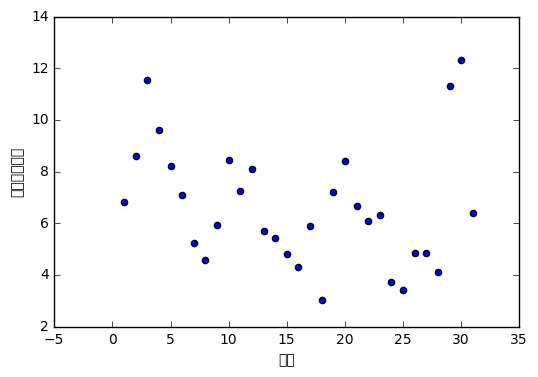

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(local_dailyDelay.day.values.astype('i8'),
            local_dailyDelay.avg_dep_delay.astype('f8'))
plt.rcParams['font.family']="SimHei" 

plt.xlabel('日期')
plt.ylabel('起飞延误时间')

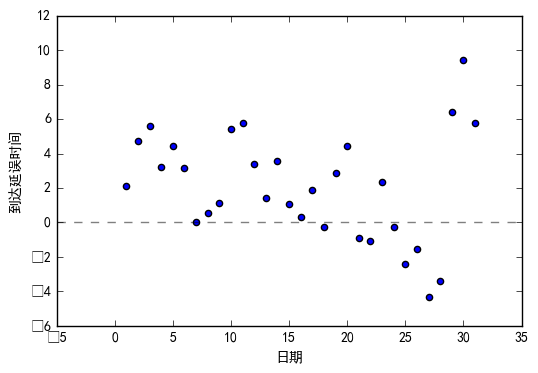

In [40]:
plt.scatter(local_dailyDelay.day.values.astype('i8'),
            local_dailyDelay.avg_arr_delay.values.astype('f8'))

plt.xlabel('日期')
plt.ylabel('到达延误时间')

plt.axhline(0, color='black', linestyle='--', alpha=0.5)

In [41]:
mySpark.stop()

## 45.7 Spark机器学习

In [42]:
#

In [43]:
from pyspark.sql import SparkSession
mySpark = SparkSession.builder\
.appName('My_LR')\
.master('local')\
.getOrCreate()


In [44]:
myDF=mySpark.read.format("csv")\
.option("inferSchema", "true")\
.option("header", "true")\
.load("women.csv")
myDF


DataFrame[_c0: int, height: int, weight: int]

In [45]:
myDF.head(3)

[Row(_c0=1, height=58, weight=115),
 Row(_c0=2, height=59, weight=117),
 Row(_c0=3, height=60, weight=120)]

In [46]:
myDF.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)



In [47]:
myDF.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,15,8.0,4.47213595499958,1,15
height,15,65.0,4.47213595499958,58,72
weight,15,136.73333333333332,15.498694261437752,115,164


In [48]:
myDF.take(3)

[Row(_c0=1, height=58, weight=115),
 Row(_c0=2, height=59, weight=117),
 Row(_c0=3, height=60, weight=120)]

In [49]:
#

In [50]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['height'], outputCol = 'features')
v_myDF = vectorAssembler.transform(myDF)
v_myDF.take(3)

[Row(_c0=1, height=58, weight=115, features=DenseVector([58.0])),
 Row(_c0=2, height=59, weight=117, features=DenseVector([59.0])),
 Row(_c0=3, height=60, weight=120, features=DenseVector([60.0]))]

In [51]:
v_myDF = v_myDF.select(['features', 'weight'])
v_myDF.take(3)

[Row(features=DenseVector([58.0]), weight=115),
 Row(features=DenseVector([59.0]), weight=117),
 Row(features=DenseVector([60.0]), weight=120)]

In [52]:
train_df=v_myDF
test_df=v_myDF

In [53]:
from pyspark.ml.regression import LinearRegression
myModel = LinearRegression(featuresCol = 'features', labelCol='weight')
myResults = myModel.fit(train_df)
myModel = LinearRegression(featuresCol = 'features', labelCol='weight', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [54]:
print("Coefficients: " + str(myResults.coefficients))
print("Intercept: " + str(myResults.intercept))

Coefficients: [3.45]
Intercept: -87.51666666666614


In [55]:
summary = myResults.summary

In [56]:
summary.residuals.take(15)

AttributeError: 'NoneType' object has no attribute 'setCallSite'

In [57]:
summary.r2

0.9910098326857506

In [58]:
summary.rootMeanSquaredError

1.419702629269787

In [59]:
predictions = myResults.transform(test_df)
predictions.show()

+--------+------+------------------+
|features|weight|        prediction|
+--------+------+------------------+
|  [58.0]|   115|112.58333333333334|
|  [59.0]|   117|116.03333333333336|
|  [60.0]|   120|119.48333333333335|
|  [61.0]|   123|122.93333333333334|
|  [62.0]|   126|126.38333333333333|
|  [63.0]|   129|129.83333333333331|
|  [64.0]|   132| 133.2833333333333|
|  [65.0]|   135| 136.7333333333333|
|  [66.0]|   139|140.18333333333328|
|  [67.0]|   142|143.63333333333327|
|  [68.0]|   146|147.08333333333326|
|  [69.0]|   150|150.53333333333325|
|  [70.0]|   154|153.98333333333326|
|  [71.0]|   159|157.43333333333325|
|  [72.0]|   164|160.88333333333324|
+--------+------+------------------+



In [60]:
predictions.select("prediction").show()

+------------------+
|        prediction|
+------------------+
|112.58333333333334|
|116.03333333333336|
|119.48333333333335|
|122.93333333333334|
|126.38333333333333|
|129.83333333333331|
| 133.2833333333333|
| 136.7333333333333|
|140.18333333333328|
|143.63333333333327|
|147.08333333333326|
|150.53333333333325|
|153.98333333333326|
|157.43333333333325|
|160.88333333333324|
+------------------+



In [61]:
mySpark.stop()